### <label style="color:green"> PRACTICA FINAL MINERIA DE DATOS Y APRENDIZAJE MAQUINA </label>

##### Alumnos:
- <label style="color:green"> Alejandro Madrid </label>
- <label style="color:green"> Alejandro Garcia </label>

In [24]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
#
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context


In [44]:
# Cargamos los datos
lfw_people = fetch_lfw_people(min_faces_per_person=70)
X = lfw_people.data
y = lfw_people.target
images = lfw_people.images
# Dividimos en entrenamiento-testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.6, random_state=42) # Cambiaremos el randomState posteriormente para comprobar que funciona bien aunque alteremos el split
# Normalizamos los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#
print(images.shape)

(1288, 62, 47)


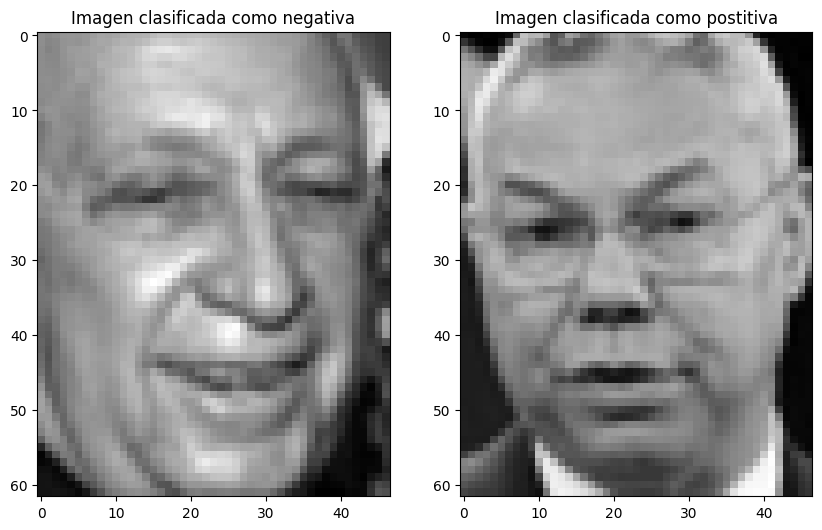

In [56]:
# Vamos a mostrar una imagen de las que usamos como clase positiva y otra de las negativas
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(images[y==0][0], cmap='gray')
plt.title("Imagen clasificada como negativa")
plt.subplot(1,2,2)
plt.imshow(images[y==1][0], cmap='gray')
plt.title("Imagen clasificada como postitiva")
plt.show()

In [36]:
print("- - - - - - - - - - - - - - -")
print("Original Dataset")
print(X)
print(y)
print("- - - - - - - - - - - - - - -")
print(f'X shape --> {X.shape}')
print(f'y shape --> {y.shape}')
print("- - - - - - - - - - - - - - -")

- - - - - - - - - - - - - - -
Original Dataset
[[0.9973857  0.9973857  0.99607843 ... 0.38431373 0.3869281  0.3803922 ]
 [0.14509805 0.1633987  0.21437909 ... 0.44575164 0.4509804  0.58300656]
 [0.34379086 0.3503268  0.4366013  ... 0.7163399  0.7202614  0.7176471 ]
 ...
 [0.35947713 0.34901962 0.32026145 ... 0.21699347 0.21568628 0.17777778]
 [0.19346406 0.21176471 0.2901961  ... 0.6862745  0.654902   0.5908497 ]
 [0.12287582 0.09803922 0.10980392 ... 0.12941177 0.1633987  0.29150328]]
[5 6 3 ... 5 3 5]
- - - - - - - - - - - - - - -
X shape --> (1288, 2914)
y shape --> (1288,)
- - - - - - - - - - - - - - -


In [37]:
print("- - - - - - - - - - - - - - -")
print("Post-scaler Xtrain+test-Dataset")
print(X_train_scaled,'\n')
print(X_test_scaled)
print("- - - - - - - - - - - - - - -")
print("post-scaler ytrain+test-Dataset")
print(y_train)
print(y_test)
print("- - - - - - - - - - - - - - -")
print(f'\nX shape --> {X_train_scaled.shape},{X_test_scaled.shape}')
print(f'y shape --> {y_train.shape},{y_test.shape}')
print("- - - - - - - - - - - - - - -")

- - - - - - - - - - - - - - -
Post-scaler Xtrain+test-Dataset
[[0.24377456 0.24146982 0.29790026 ... 0.7742782  0.714849   0.42352942]
 [0.4508519  0.46587926 0.5131234  ... 0.964567   0.9369251  0.8745098 ]
 [0.49410224 0.44619423 0.4238845  ... 0.1128609  0.08541393 0.09542484]
 ...
 [0.49017036 0.46194226 0.4566929  ... 0.39895013 0.39553222 0.5764706 ]
 [0.4193971  0.44356954 0.48818904 ... 0.18110237 0.20105127 0.23137255]
 [0.04456094 0.04855643 0.06036745 ... 0.6692914  0.7647832  0.85490197]] 

[[0.35779816 0.37007874 0.30708662 ... 0.09186352 0.10118266 0.1124183 ]
 [0.4338139  0.40944883 0.42388454 ... 0.00787402 0.00394218 0.00784314]
 [0.25294888 0.3766404  0.5104987  ... 0.77690285 0.69119585 0.669281  ]
 ...
 [0.15727392 0.23884515 0.41469815 ... 0.10629921 0.1195795  0.13333334]
 [0.47968543 0.47900262 0.5091864  ... 0.43175852 0.37844944 0.32941177]
 [0.23328963 0.27821523 0.332021   ... 0.59842527 0.56373197 0.4130719 ]]
- - - - - - - - - - - - - - -
post-scaler ytrain

In [ ]:
# Aquí vamos a sacar una imagen de la que buscamos clasificar y otra de las que no


In [13]:
# Ahora vamos a aplicar los m'etodos de reducci'on de la dimensionalidad
methods = {
    'PCA' :     PCA(n_components=2),
    'MDS' :     MDS(n_components=2),
    'ISOMAP':   Isomap(n_components=2),
    'LLE':      LocallyLinearEmbedding(n_components=2)
}
#
X_train_reduced = {}
X_test_reduced = {}
tiempo_ejecucion = {}
#
for name, method in methods.items():
        start_time = time.time()
        X_train_reduced[name] = method.fit_transform(X_train_scaled)
        X_test_reduced[name] = method.fit_transform(X_test_scaled)
        end_time = time.time()
        tiempo_ejecucion[name] = end_time - start_time
        

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/threadpoolctl.py:1223: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


In [22]:
def plot_preprocessing(X_data, Y_data, labels, method_name):
    plt.figure(figsize=(10,6))
    plt.scatter(X_data, Y_data, c=labels, cmap='viridis', label=method_name)
    plt.title(f'Reduction with {method_name}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def print_data_preprocessing(X_data, Y_data, method_name):
    print(X_data, '\n', Y_data, f'\nfor method -->{method_name}')
    print(f'X shape --> {X_data.shape}')
    print(f'Y shape --> {Y_data.shape}')

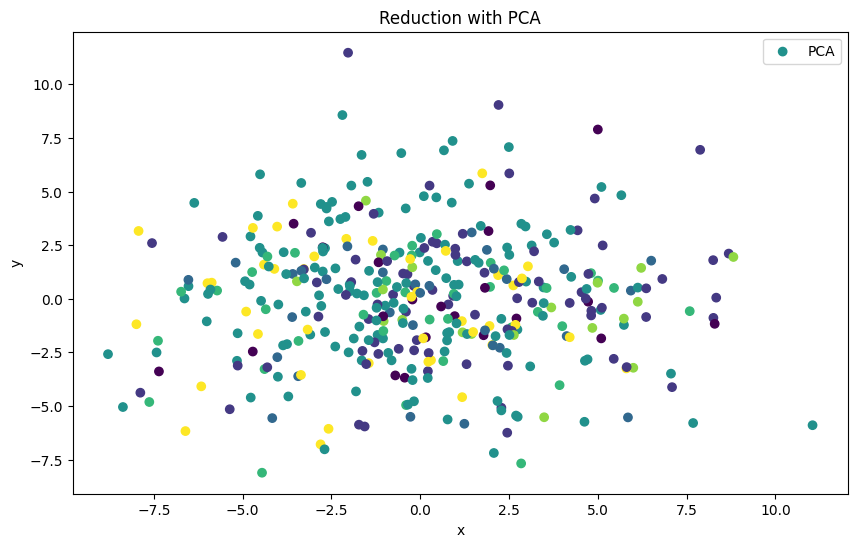

[-4.44187689e+00  3.69263983e+00  2.50979614e+00  8.33578205e+00
  2.44822836e+00 -3.58800912e+00 -4.34804201e+00 -2.03064013e+00
  1.45147252e+00 -5.99003458e+00 -1.04989827e+00  8.25621700e+00
  7.58725166e-01 -7.92946482e+00  5.93158627e+00 -1.22686779e+00
 -1.09505284e+00  5.44995451e+00 -1.52837002e+00 -3.43578529e+00
  1.64712644e+00 -2.19039607e+00 -7.38280630e+00 -6.52393961e+00
  2.84845757e+00  7.88338137e+00  2.24228215e+00  2.71085596e+00
  9.71951187e-01  1.92448664e+00  3.56725669e+00  1.96797073e+00
 -3.58759952e+00  1.37535858e+00 -4.00667620e+00 -1.81884611e+00
 -1.73447740e+00 -6.63684797e+00 -4.71358967e+00  2.57586670e+00
 -9.60042551e-02 -1.65025973e+00  3.15614700e+00 -3.09475875e+00
  9.12976980e-01  2.73832870e+00 -1.98521411e+00  2.19366217e+00
  3.13945818e+00 -3.27788472e+00 -4.02291155e+00  5.09827709e+00
  6.12702942e+00 -7.63118505e-01  1.08364224e+00  4.65917647e-01
  3.45189720e-01  3.51687789e-01 -3.57708752e-01 -3.34841728e+00
 -6.36141109e+00 -2.91044

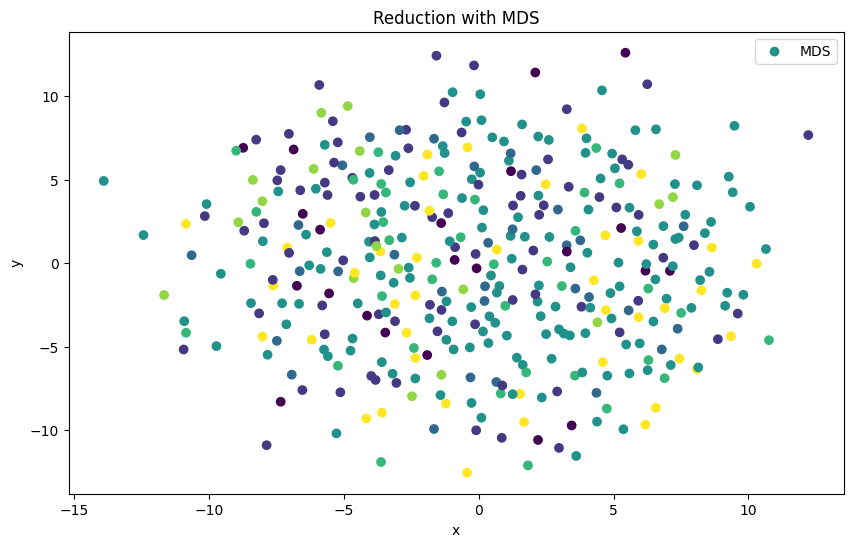

[ 6.96240959e+00 -4.19277302e+00 -6.22547463e-01 -7.04263484e+00
  4.67996393e-02  5.55729181e+00  3.56465769e+00  1.22191462e+01
  2.13167089e+00  8.08497839e+00  3.25760057e+00 -8.25781190e+00
 -2.55612508e+00  9.35330100e+00 -5.06074374e+00  3.08004262e+00
  2.10037441e-01 -7.96813390e+00  7.19792065e+00 -3.10411939e-01
  1.60402480e+00  9.27033048e+00  4.74686299e+00  7.11823378e+00
  9.34341453e-01 -1.57173068e+00 -6.64305636e+00 -5.88689426e+00
 -5.55308135e+00  1.19286935e+00 -4.69463096e-01 -1.47362099e+00
  8.64021004e+00  3.99253453e+00 -2.69747158e-01  7.98037448e+00
  5.27784951e+00  5.58594073e+00  2.19504723e+00 -3.32041390e+00
 -6.54402927e+00  8.09284484e+00 -4.69131255e+00  1.40979575e+00
  5.80759985e+00 -4.07311739e+00  2.22735917e+00 -4.17045369e-01
  9.94172758e-02  6.89668905e+00  6.49323408e-01 -6.52897705e+00
 -5.71300765e+00  1.61733828e+00 -2.61739195e-01  2.40701513e+00
 -1.19151369e-01  2.23794788e+00  4.47217402e+00  8.38314024e+00
  9.81117309e+00  5.22212

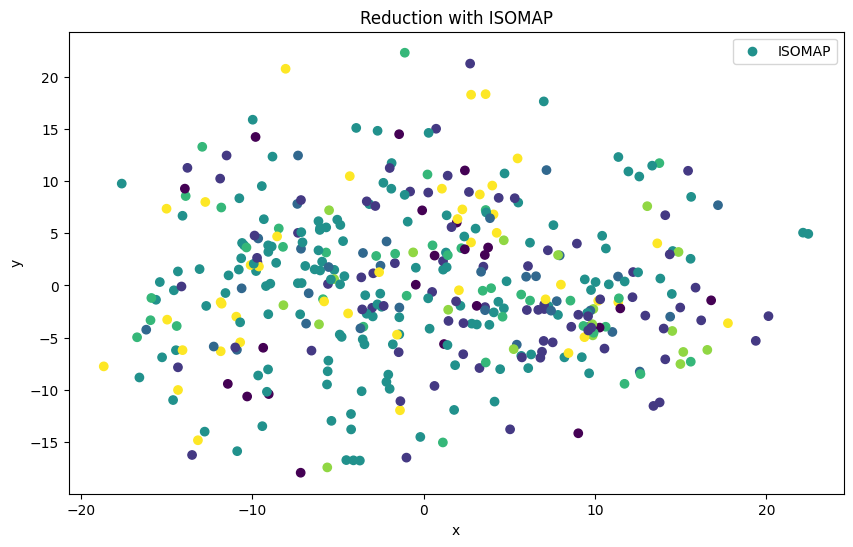

[-12.693562     9.903732     4.4637394   16.197363     5.6964674
 -10.901668    -8.458113   -13.519361     5.434023   -14.339494
  -6.8626223   20.12436      1.3403517  -18.673864    11.013802
  -5.8769093   -1.4193268   12.187475    -5.627313    -9.658175
   0.3454856   -9.4190445  -13.891683   -14.580431     4.137001
  13.411824     9.730702     3.569204     3.7598276    1.1855944
   1.7772331    3.4440362  -10.710882    -0.19637807  -8.824751
  -7.335554   -10.3039875  -10.651415    -9.812752     8.5658245
   6.0880475   -5.5640397    3.5815318  -10.483925    -4.0991793
  10.63475     -6.044762    11.357566     6.2723136  -11.84801
  -7.3754883   11.47561      7.2768383   -1.6817025    2.8071394
   0.62949336   0.49330506   1.4480685    6.8107276  -10.885065
 -14.626759    -9.706251    -6.9117255   -7.14402     -1.889106
  10.621433   -14.344993     1.0636392    7.5300217   -2.4543757
  -9.784261   -11.432379    -2.9724627    2.7625668   13.049493
  -2.6913834   16.778627     3.9367

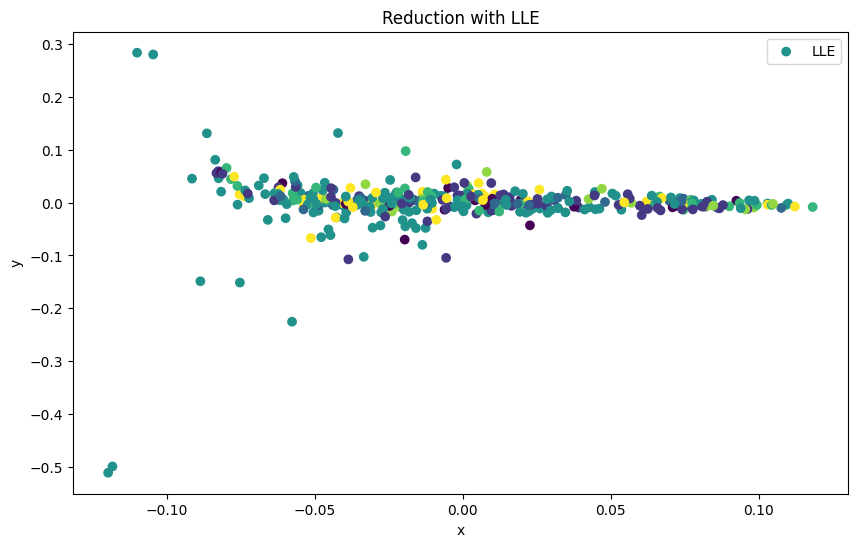

[-3.94666425e-02  7.59952088e-02  4.28283736e-02  8.20310673e-02
  2.60672217e-02 -4.40111491e-02 -3.06104176e-02 -3.87286896e-02
  2.32053192e-02 -3.07155640e-02 -3.97503145e-02  7.80252389e-02
 -6.20488120e-03 -5.38217413e-02  8.60019823e-02 -2.31982748e-02
 -1.18707639e-02  7.65877267e-02 -2.10705999e-02 -5.22785572e-02
  8.56335782e-03 -5.77650502e-02 -7.84099017e-02 -6.18366356e-02
  4.61840869e-02  6.04774392e-02  6.98647819e-02  4.11672095e-03
  1.95184009e-02  2.24405097e-02  3.20571203e-02 -3.43700762e-04
 -5.14155546e-02 -1.25975757e-02 -2.63706398e-02 -3.50681034e-02
 -3.73756087e-02 -7.61826067e-02 -6.10160839e-02  1.09424826e-01
  1.46162705e-02 -3.35145739e-02  1.50705458e-02 -6.36922898e-02
 -1.36999375e-02  7.33721534e-02 -6.06292287e-02  5.45917519e-02
  1.93376011e-02 -5.13737241e-02 -4.37665239e-02  9.24562057e-02
  2.86285770e-02 -1.81741005e-02  2.86752889e-02  2.28479937e-02
  2.07104901e-02  3.38802936e-05  2.82788536e-02 -4.27079633e-02
 -4.87856512e-02 -6.23106

In [23]:
# Ahora graficamos los m'etodos de reducci'on 
for name, X_train_data in X_train_reduced.items():
    plot_preprocessing(X_train_data[:,0], X_train_data[:,1], y_train, name)
    print_data_preprocessing(X_train_data[:,0], X_train_data[:,1], name)

### Aplicación de modelos